## Amitree Data Science Business Intelligence Challenge

Author: Pamela Krueger \\ 
Last Date Edited: February 16, 2019 \\
Project Goal: See challenge document and data in project file.
    Transform/organize the data into an appropriate shape to create visualizations.
    Create visualizations similar to those in challenge document.

Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set()

In [2]:
#load in the data
initial_data = pd.read_csv('the_event_data.csv')
initial_data.head()

,event_id,user_id,event_type,timestamp
0,41486276,1331979.0,PhotoNameManuallyCreated,2018-11-26 22:18:02
1,41486371,1534809.0,AccountDeleted,2018-11-26 22:18:50
2,41485779,697740.0,PhotoNameSuggested,2018-11-26 22:13:07
3,41485798,911751.0,PhotoNameSuggested,2018-11-26 22:13:21
4,41485258,1209480.0,PhotoNameSuggested,2018-11-26 22:08:33


Data Exploration

In [3]:
#total number of observations
initial_data.shape[0]

1225133

In [4]:
#checking for missing values for each variable
initial_data.isnull().sum()
#507 missing values for user_id

event_id        0
user_id       507
event_type      0
timestamp       0
dtype: int64

In [5]:
#inspecting the data where the user_ids are missing
initial_data.loc[initial_data['user_id'].isnull(),:]

,event_id,user_id,event_type,timestamp
148515,21730070,NaN,PhotoNameManuallyCreated,2018-07-03 15:04:03
148618,21729916,NaN,PhotoNameManuallyCreated,2018-07-03 15:01:12
149124,21731688,NaN,PhotoNameManuallyCreated,2018-07-03 15:29:55
151068,21739051,NaN,PhotoNameManuallyCreated,2018-07-03 17:19:00
151083,21738245,NaN,PhotoNameManuallyCreated,2018-07-03 17:07:19
151842,21741235,NaN,PhotoNameManuallyCreated,2018-07-03 17:52:00
153769,20588064,NaN,PhotoNameManuallyCreated,2018-06-01 22:28:57
156163,21760768,NaN,PhotoNameManuallyCreated,2018-07-03 23:40:19
156185,21760004,NaN,PhotoNameManuallyCreated,2018-07-03 23:22:50
156429,21760344,NaN,PhotoNameManuallyCreated,2018-07-03 23:30:29


In [6]:
#checking to see the event_type of the null user_ids
missing_data = initial_data.loc[initial_data['user_id'].isnull(),:]
missing_data['event_type'].value_counts()

PhotoNameManuallyCreated    506
AccountDeleted                1
Name: event_type, dtype: int64

In [7]:
#looking at the number of missing values relative to overall size of data
507/initial_data.shape[0]

0.00041383262062159783

In [8]:
#new dataset - dropping any data with missing user_ids
data = initial_data.copy()
data = data.dropna(subset=['user_id'])

In [9]:
#double checking for missing values for each variable
data.isnull().sum()
#no remaining missing values

event_id      0
user_id       0
event_type    0
timestamp     0
dtype: int64

In [10]:
#checking new number of observations after dropping missing user_id values
data.shape

(1224626, 4)

In [11]:
#total number of non-null user_ids
data['user_id'].count()

1224626

In [12]:
#total number of non-null unique user_ids
data['user_id'].nunique()

76945

In [13]:
#creating quick aggregation to see how many observations fit into each event_type category
event_type_size = data.groupby('event_type').size()

In [14]:
event_type_size[:]

event_type
AccountCreated                  31601
AccountDeleted                  11267
PhotoNameManuallyCreated        59030
PhotoNameSuggested             981051
PhotoNameSuggestionAccepted    141677
dtype: int64

In [15]:
#converting the user_id variable to int
data['user_id'] = data['user_id'].astype(int)

In [16]:
data.head()

,event_id,user_id,event_type,timestamp
0,41486276,1331979,PhotoNameManuallyCreated,2018-11-26 22:18:02
1,41486371,1534809,AccountDeleted,2018-11-26 22:18:50
2,41485779,697740,PhotoNameSuggested,2018-11-26 22:13:07
3,41485798,911751,PhotoNameSuggested,2018-11-26 22:13:21
4,41485258,1209480,PhotoNameSuggested,2018-11-26 22:08:33


Creating new variables relevant to the analysis

In [17]:
#converting the timestamp to dates
data['month'] = pd.DatetimeIndex(data['timestamp']).month
data['year'] = pd.DatetimeIndex(data['timestamp']).year
data['day'] = pd.DatetimeIndex(data['timestamp']).day
data['timestamp'] = data['timestamp'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [18]:
#double checking all data is 2018 data
year_size = data.groupby('year').size()
year_size

year
2018    1224626
dtype: int64

In [19]:
#looking at the number of transactions in each month
month_size = data.groupby('month')['event_type'].size()
month_size

month
5       9415
6     241131
7     167977
8     153877
9     128448
10    196139
11    183952
12    143687
Name: event_type, dtype: int64

In [20]:
#creating a set of new user_ids
new_user_ids = data.loc[data['event_type']=="AccountCreated",'user_id']
new_user_ids.head()

358     1728300
1085    1728456
1269    1728477
1316    1719576
1357    1728492
Name: user_id, dtype: int64

In [21]:
new_user_ids.shape[0]
#31,601 new users during this time period

31601

In [22]:
#filtering down from original dataset to only new user data
new_user_ids = list(new_user_ids)
new_users = data.loc[data['user_id'].isin(new_user_ids),:].copy()

In [23]:
#checking to make sure only new user data is included in the new dataset
list(new_users['user_id'].unique()).sort() == new_user_ids.sort()

True

In [24]:
#size of new dataset for only new users
new_users.shape

(389391, 7)

In [25]:
#a user is considered active if they have named a photograph
#either by doing so manually or accepting a suggestion
created = "PhotoNameManuallyCreated"
accepted = "PhotoNameSuggestionAccepted"
new_users['active'] = 0
new_users.loc[new_users['event_type'] == created, ['active']] = 1
new_users.loc[new_users['event_type'] == accepted, ['active']] = 1

In [26]:
#group by the data by user_id and sort ascending within each group by timestamp
user_id_grouped = new_users.sort_values(['timestamp'],ascending = True).groupby('user_id')

In [27]:
user_id_grouped.head()

,event_id,user_id,event_type,timestamp,month,year,day,active
165030,20509692,1412805,AccountCreated,2018-05-31 00:15:20,5,2018,31,0
165868,20510352,1410105,AccountCreated,2018-05-31 00:32:26,5,2018,31,0
165213,20510511,1412832,AccountCreated,2018-05-31 00:37:13,5,2018,31,0
166007,20510533,1412832,PhotoNameSuggested,2018-05-31 00:37:51,5,2018,31,0
166009,20510553,1412832,PhotoNameSuggested,2018-05-31 00:38:32,5,2018,31,0
166008,20510554,1412832,PhotoNameSuggested,2018-05-31 00:38:35,5,2018,31,0
166010,20510577,1412832,PhotoNameSuggested,2018-05-31 00:39:07,5,2018,31,0
166180,20511471,1412895,AccountCreated,2018-05-31 00:59:44,5,2018,31,0
166465,20511478,1412895,PhotoNameSuggested,2018-05-31 00:59:54,5,2018,31,0
166408,20511773,1412898,AccountCreated,2018-05-31 01:08:04,5,2018,31,0


In [28]:
#filtering each user_id's history to look at only first 7 days
def filter_group(group):
    group = group.reset_index()
    first_ts = group.iloc[0,4]
    group['time_diff'] = ( first_ts - 
                          group['timestamp']).apply(lambda x: -x.days)
    group = group.loc[group['time_diff'] < 8,:]
    return group

#checking if the user was active
def is_active(user):
    user = filter_group(user)
    return user['active'].sum() > 0

#checking to see if photo name suggested in first 7 days
def suggestion_raised(user):
    user = filter_group(user)
    events = list(user['event_type'].unique())
    return "PhotoNameSuggested" in events

In [29]:
#test case to confirm if user_id is_active
is_active(user_id_grouped.get_group(3246))

True

In [30]:
user_id_grouped.get_group(3246)

,event_id,user_id,event_type,timestamp,month,year,day,active
744708,34165792,3246,AccountCreated,2018-09-05 22:19:56,9,2018,5,0
744579,34166935,3246,PhotoNameSuggested,2018-09-05 22:24:05,9,2018,5,0
744693,34166966,3246,PhotoNameSuggested,2018-09-05 22:24:14,9,2018,5,0
711237,34334745,3246,PhotoNameManuallyCreated,2018-09-07 00:51:48,9,2018,7,1
712802,34339071,3246,PhotoNameSuggestionAccepted,2018-09-07 01:36:54,9,2018,7,1
747472,34486854,3246,PhotoNameSuggestionAccepted,2018-09-08 14:20:03,9,2018,8,1
1075211,39278719,3246,PhotoNameManuallyCreated,2018-11-04 03:48:45,11,2018,4,1


In [31]:
#returns boolean vector of whether user was active in first seven days
user_activation = user_id_grouped.apply(is_active)

In [32]:
#creating subset of those who were active
active_users = user_activation.loc[user_activation]

In [33]:
display(user_activation.head())
display(active_users.head())

user_id
3246      True
28149     True
28866    False
35160     True
62487     True
dtype: bool

user_id
3246      True
28149     True
35160     True
62487     True
400212    True
dtype: bool

In [34]:
#creating subset of those users for whom a suggestion was raised
user_suggestions = user_id_grouped.apply(suggestion_raised)

In [35]:
#obtaining user creation week dates
creation_week = user_id_grouped.first()['timestamp'].apply(lambda x: x.isocalendar()[1])
creation_week_dates = user_id_grouped.first()['timestamp'].apply(lambda x: (x.month, (x.day - x.isocalendar()[2] + 1)))

In [36]:
creation_week_dates = [dt.date(2018,x[0],x[1]).strftime('%b %d') for x in sorted(list(creation_week_dates.unique()))if x[1] > 0]

In [37]:
creation_week_dates

['May 28',
 'Jun 04',
 'Jun 11',
 'Jun 18',
 'Jun 25',
 'Jul 02',
 'Jul 09',
 'Jul 16',
 'Jul 23',
 'Jul 30',
 'Aug 06',
 'Aug 13',
 'Aug 20',
 'Aug 27',
 'Sep 03',
 'Sep 10',
 'Sep 17',
 'Sep 24',
 'Oct 01',
 'Oct 08',
 'Oct 15',
 'Oct 22',
 'Oct 29',
 'Nov 05',
 'Nov 12',
 'Nov 19',
 'Nov 26',
 'Dec 03',
 'Dec 10',
 'Dec 17',
 'Dec 24',
 'Dec 31']

In [38]:
#creating final dataset with creation week, active and suggested columns
new_user_summary = pd.DataFrame(creation_week)
new_user_summary['active'] = user_activation
new_user_summary['suggested'] = user_suggestions
new_user_summary.columns = ['creation_week', 'active','suggested']

In [39]:
new_user_summary.head()

,creation_week,active,suggested
user_id,,,
3246,36,True,True
28149,34,True,True
28866,51,False,False
35160,33,True,True
62487,37,True,True


In [40]:
#the previous data manipulation resulted in week 53 being coded
#as '1'. correcting that here:
new_user_summary['creation_week'] = [53 if x == 1 else x for x in new_user_summary['creation_week']]

In [41]:
#grouping the data by creation week
grouped_new_users = new_user_summary.groupby('creation_week')

In [42]:
#creating metric for the proportion of all users who were active
grey = grouped_new_users.apply(lambda x: (x['active'].sum() / x['active'].shape) * 100)

In [43]:
grey

creation_week
22    [41.131105398457585]
23     [42.88407163053723]
24    [46.810089020771514]
25    [50.406976744186046]
26    [44.541778975741245]
27    [41.935483870967744]
28     [47.06616729088639]
29     [45.33029612756264]
30     [42.62152777777778]
31     [43.41232227488152]
32    [40.733772342427095]
33    [39.059304703476485]
34    [36.787564766839374]
35    [31.179564237415473]
36     [32.28438228438228]
37    [31.666666666666664]
38    [29.782761037140855]
39    [29.879101899827287]
40     [32.65895953757225]
41     [33.91655450874832]
42     [37.83319002579535]
43     [35.80121703853955]
44      [38.4526558891455]
45     [34.45161290322581]
46     [36.55778894472362]
47    [34.285714285714285]
48    [31.345353675450767]
49     [33.70429252782194]
50     [37.35537190082645]
51    [30.158730158730158]
52    [28.156748911465897]
53    [21.568627450980394]
dtype: object

In [44]:
#creating metric for active users who received at least one name suggestion
orange = grouped_new_users.apply(lambda x: (x.loc[x['suggested'],'active'].sum() / 
                                            x.loc[x['suggested'],'active'].shape)*100) 
#creating metric for active users who did not have a name suggestion
blue = grouped_new_users.apply(lambda x: (x.loc[x['suggested'] == False,'active'].sum() /
                                          x.loc[x['suggested']== False,'active'].shape)*100) 

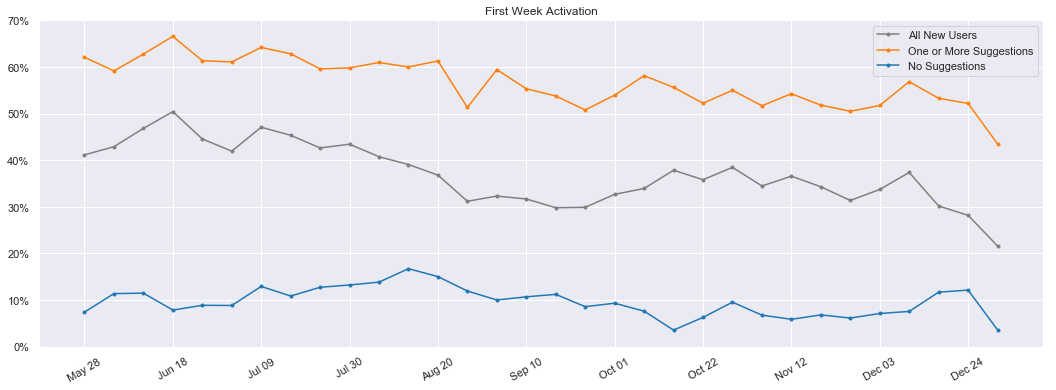

In [45]:
#creating Plot 1: First Week Activation
plt.figure(figsize=(18,6))
_ = plt.grid(color='white')
_ = plt.plot(grey, c = 'tab:gray', 
             marker='.', 
             label='All New Users')
_ = plt.plot(orange, c = 'tab:orange', 
             marker='.', 
             label='One or More Suggestions')
_ = plt.plot(blue, c = 'tab:blue', 
             marker='.', 
             label='No Suggestions')
_ = plt.title('First Week Activation')
_ = plt.legend(loc='best')
_ = plt.xticks(range(22,53, 3), creation_week_dates[::3],rotation=30)
ticks, labs = plt.yticks()
_ = plt.yticks(ticks, ['{}%'.format(int(x)) for x in ticks])
plt.show()

In [46]:
#creating suggested users variable for Plot 2
bottom_orange = grouped_new_users.apply(
    lambda x: ((x['suggested'].sum()/x['suggested'].shape)* 100)[0])
bottom_orange.values

array([61.6966581 , 65.97549482, 68.91691395, 72.5       , 67.99191375,
       63.38273758, 66.60424469, 66.36294609, 63.80208333, 64.83412322,
       57.10253998, 51.63599182, 47.06390328, 48.91059354, 45.1048951 ,
       47.03703704, 43.65802383, 50.51813472, 52.31213873, 52.08613728,
       65.86414445, 64.30020284, 63.62586605, 61.67741935, 63.44221106,
       61.0989011 , 56.86546463, 59.61844197, 60.49586777, 44.44444444,
       40.05805515, 45.09803922])

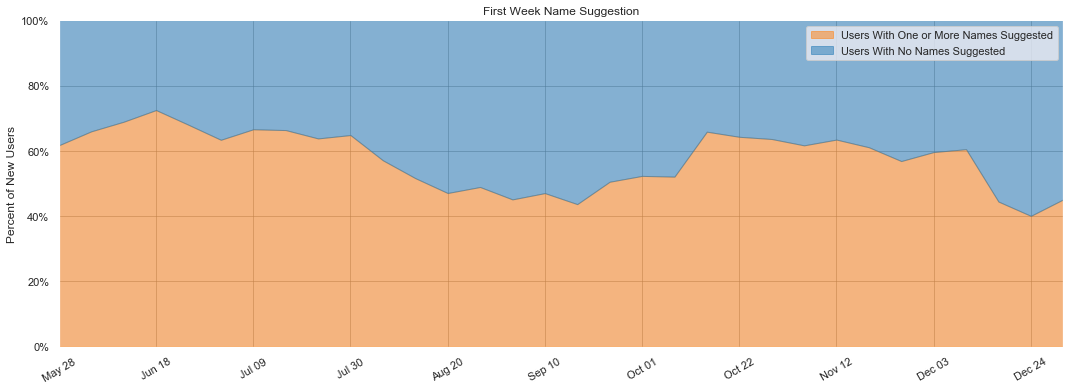

In [47]:
#creating Plot 2
plt.figure(figsize=(18,6))
_ = plt.fill_between(x=bottom_orange.index, 
                     y1 = bottom_orange.values, 
                     color = 'tab:orange',
                     alpha = .5 ,
                     label='Users With One or More Names Suggested')
_ = plt.fill_between(x=bottom_orange.index, 
                     y1 = bottom_orange.values, 
                     y2=100, color = 'tab:blue',
                     alpha = .5,
                     label='Users With No Names Suggested' )
_ = plt.grid(color='gray', alpha=.5)
_ = plt.xlim(22,53)
_ = plt.ylim(0,100)
_ = plt.title('First Week Name Suggestion')
_ = plt.ylabel('Percent of New Users')
_ = plt.legend(loc='best')
ticks, labs = plt.yticks()
_ = plt.yticks(ticks, ['{}%'.format(int(x)) for x in ticks])
_ = plt.xticks(range(22,53, 3), creation_week_dates[::3],rotation=30)

In [48]:
#Adding the dates into the final data file
new_user_summary['dates'] = new_user_summary['creation_week'].apply(lambda x: creation_week_dates[x-22])

In [49]:
#including the year
new_user_summary['dates'] = new_user_summary['dates'].apply(lambda x: x + ', 2018')

In [50]:
new_user_summary.head()

,creation_week,active,suggested,dates
user_id,,,,
3246,36,True,True,"Sep 03, 2018"
28149,34,True,True,"Aug 20, 2018"
28866,51,False,False,"Dec 17, 2018"
35160,33,True,True,"Aug 13, 2018"
62487,37,True,True,"Sep 10, 2018"


In [51]:
#exporting the final dataset into a csv file
new_user_summary.to_csv('new_user_summary.csv')